### 1. Acquiring Data 

In [1]:
#Import Required Libraries
import numpy as np 
import pandas as pd

### 2. Exploratory Data Analysis 

In [2]:
#Read Data from Dataset
bank_df = pd.read_csv(r"C:\Users\Deepak Prakash\source\repos\Bank Marketing Analysis\Dataset (6MB)\bank-additional-full.csv",delimiter=';')
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Checks the columns and data, eg Age,Cabin column has some missing data 
# We would require some feature engineering for missing data
bank_df.info()                  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
bank_df.shape  #There are 41188 rows and 21 columns

#### As per Problem Statement there are Missing Value Attributes 

In [4]:
# Missing Attribute Values: There are several missing values in some categorical attributes, 
#all coded with the "unknown" label. These missing values can be treated as a possible class label 
#or using deletion or imputation techniques.

bank_df.isnull().sum() 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Requirement: To Check if  Client would subscribe To Term Deposit Or Not

In [9]:
for col in bank_df.select_dtypes(include='object').columns:
    print(col)
    print(bank_df[col].unique())

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome
['nonexistent' 'failure' 'success']
y
['no' 'yes']


In [10]:
bank_df = bank_df.rename(columns={'y':'deposit'})
bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [11]:
bank_df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [12]:
unknown_jobs = bank_df.query('job == "unknown"')
unknown_jobs['deposit'].value_counts()

no     293
yes     37
Name: deposit, dtype: int64

In [13]:
pdays = bank_df.query('pdays == "999"')  #1115, #39673
pdays['deposit'].value_counts()

no     36000
yes     3673
Name: deposit, dtype: int64

In [14]:
bank_df[['emp.var.rate','deposit']].value_counts()

emp.var.rate  deposit
 1.4          no         15368
-1.8          no          7723
 1.1          no          7523
-0.1          no          3451
-1.8          yes         1461
-2.9          no          1069
 1.4          yes          866
-3.4          no           617
-2.9          yes          594
-3.4          yes          454
-1.7          yes          403
              no           370
-1.1          no           334
              yes          301
 1.1          yes          240
-0.1          yes          232
-3.0          yes           88
              no            84
-0.2          no             9
              yes            1
dtype: int64

###  3. Visualization

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Catergorical Feature Distribution
# Relationship between Categorical Features and Labels
# Relationship betweeen Numerical Features and Labels

In [17]:
bank_df.deposit.value_counts()

no     36548
yes     4640
Name: deposit, dtype: int64

In [18]:
bank_df.deposit.value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: deposit, dtype: float64

<AxesSubplot:title={'center':'Deposit'}>

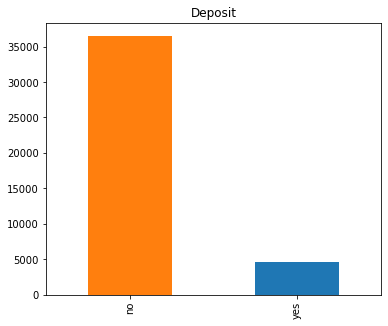

In [19]:
bank_df.deposit.value_counts().plot(kind='bar',stacked=True,figsize=(6,5),color=['C1','C0'],title='Deposit')

In [20]:
categorical_feature_list = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
categorical_feature_list

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [21]:
numerical_feature_list = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
numerical_feature_list

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [47]:
list(enumerate(categorical_feature_list))

[(0, 'job'),
 (1, 'marital'),
 (2, 'education'),
 (3, 'default'),
 (4, 'housing'),
 (5, 'loan'),
 (6, 'contact'),
 (7, 'month'),
 (8, 'day_of_week'),
 (9, 'poutcome')]

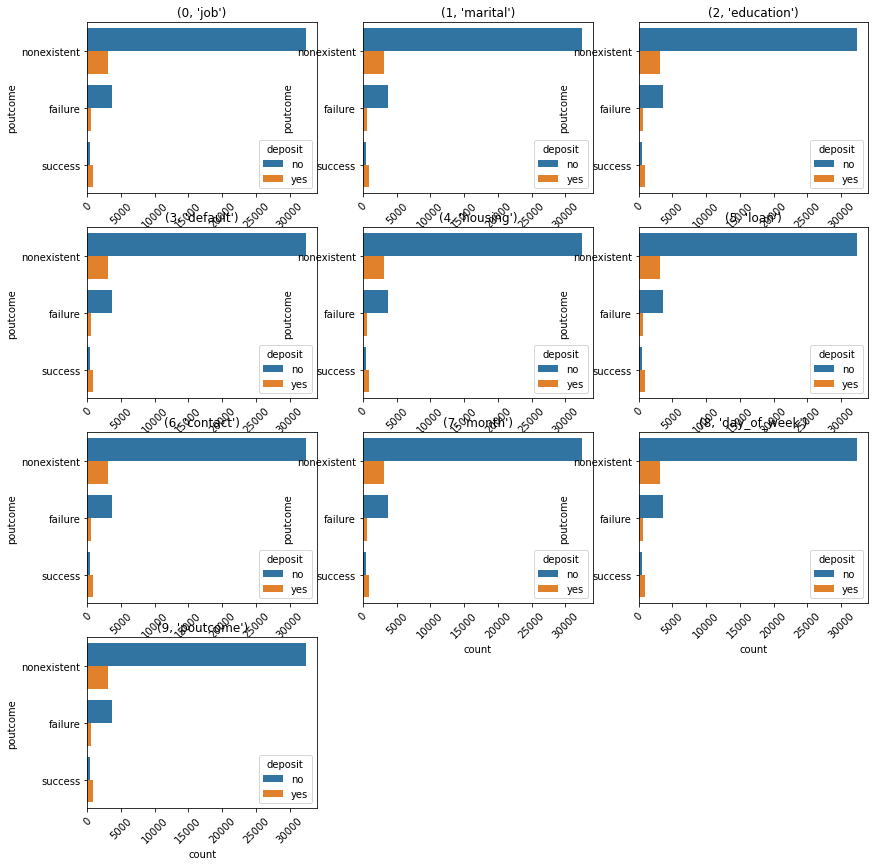

In [82]:
#plt.figure(figsize=(14,22))
#for i in enumerate(categorical_feature_list):
#    ax=plt.subplot(6,3,i[0]+1)
#    plt.xlabel(i)
#    plt.title(i)
#    sns.countplot(y=categorical_feature,hue='deposit',data=bank_df)
#    plt.xticks(rotation=45)
#plt.show()

In [251]:
#sns.pairplot(data = bank_df[['job','marital','education']])
#sns.pairplot(bank_df, hue="A", vars=["job", "marital", "education"])

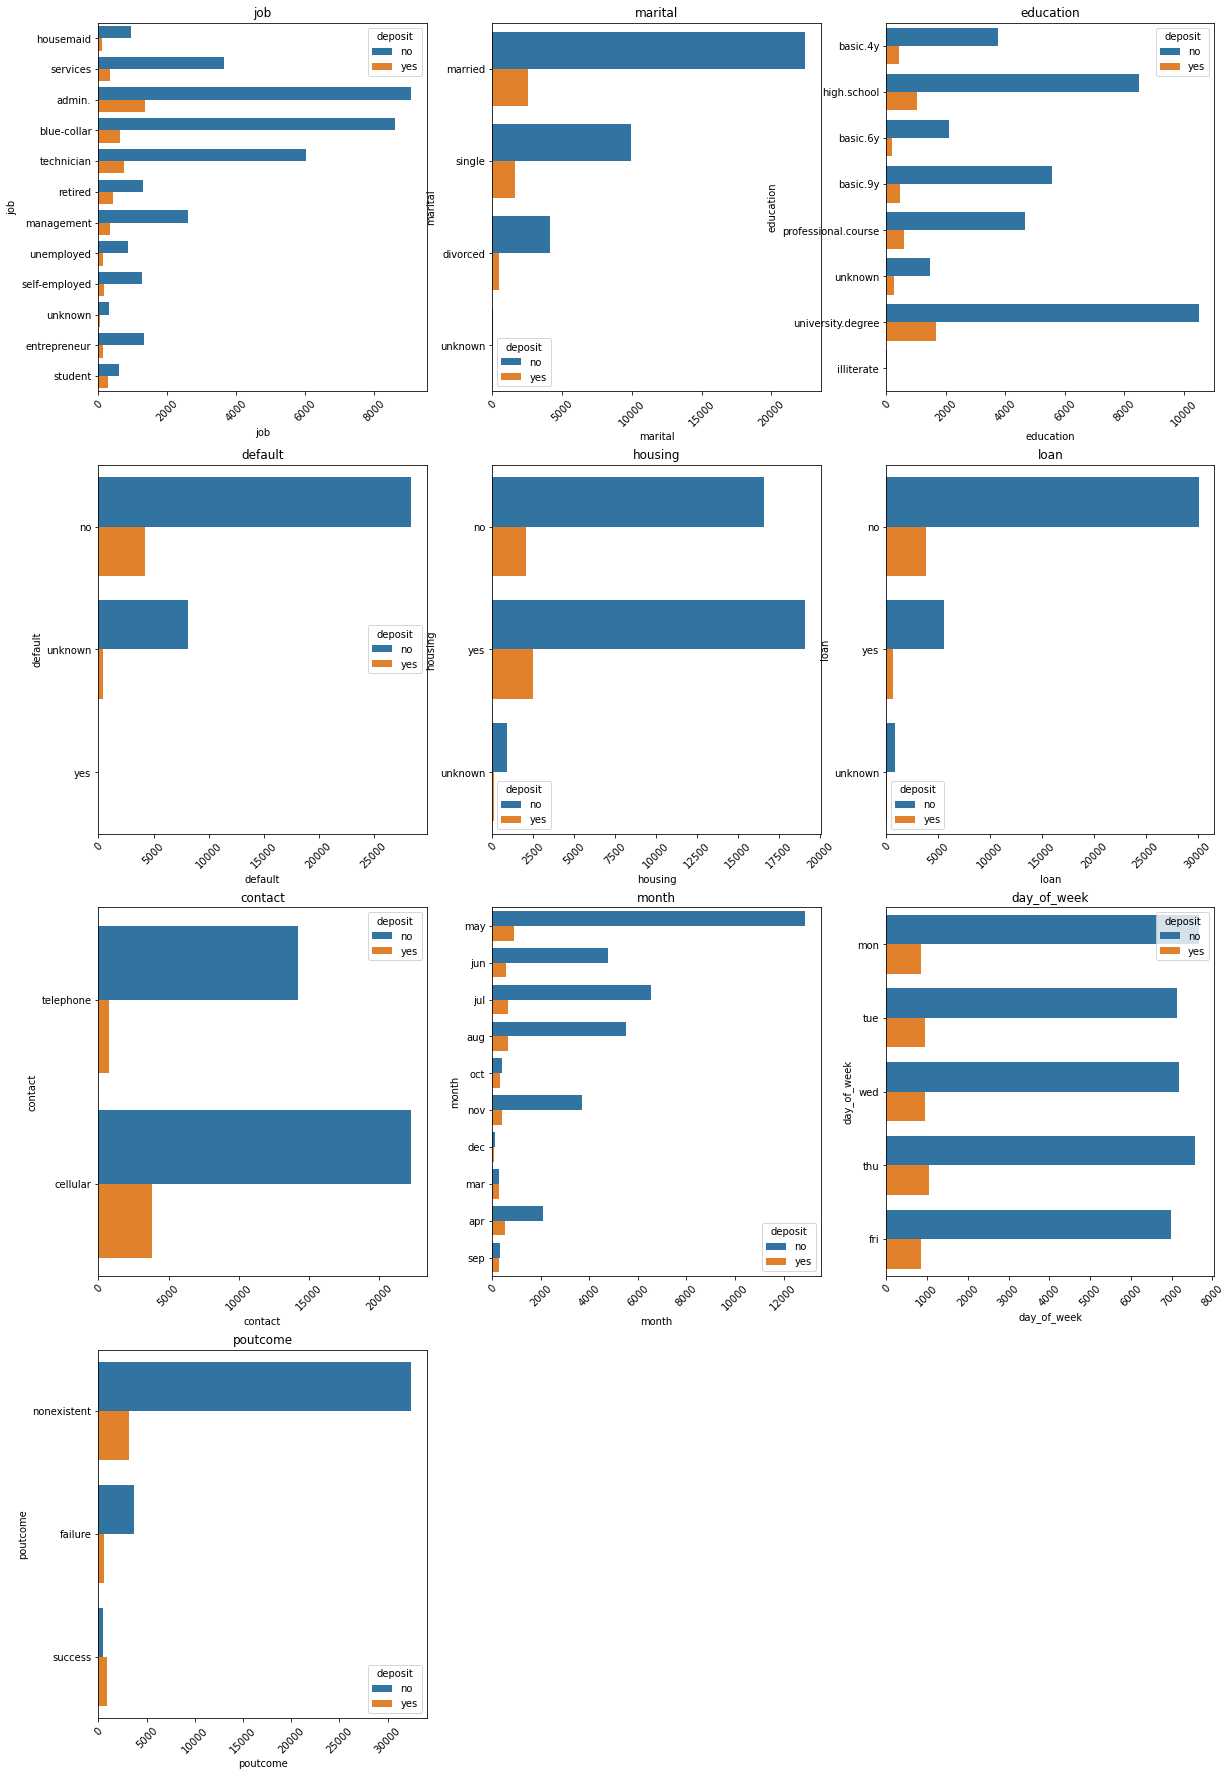

In [86]:
plt.figure(figsize=(20,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_feature_list:
    ax = plt.subplot(10,3,plotnumber)
    sns.countplot(y=categorical_feature,hue='deposit',data=bank_df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plt.xticks(rotation=45)
    plotnumber+=1
plt.show()

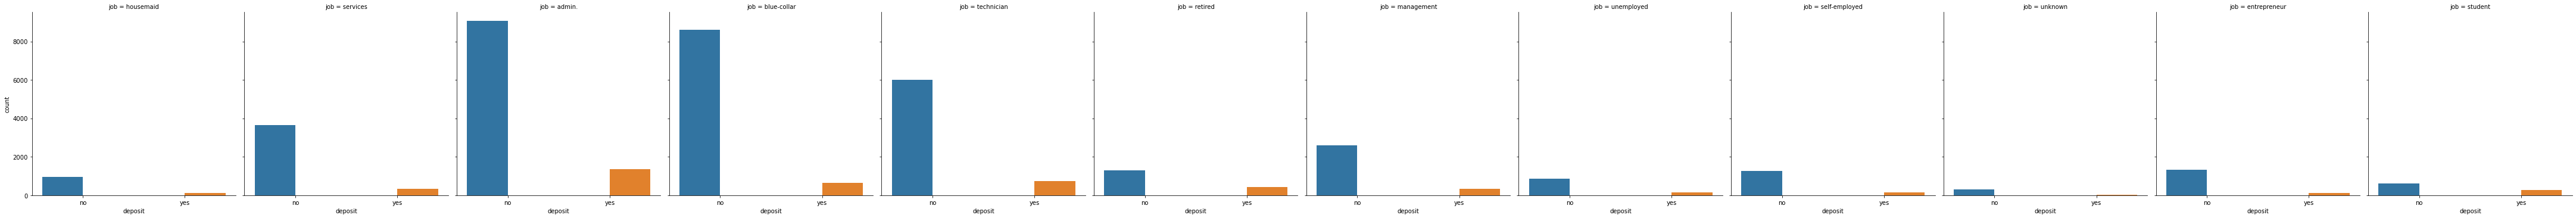

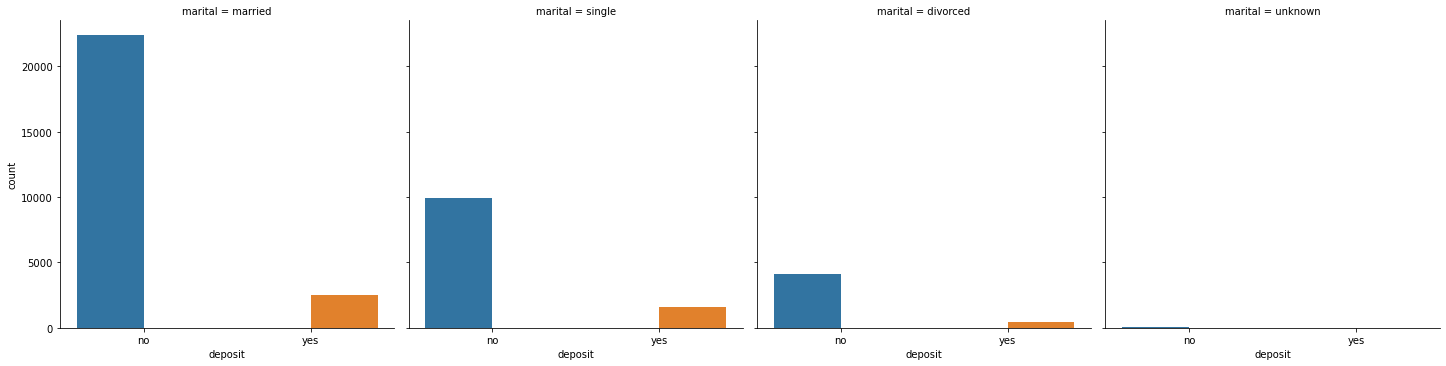

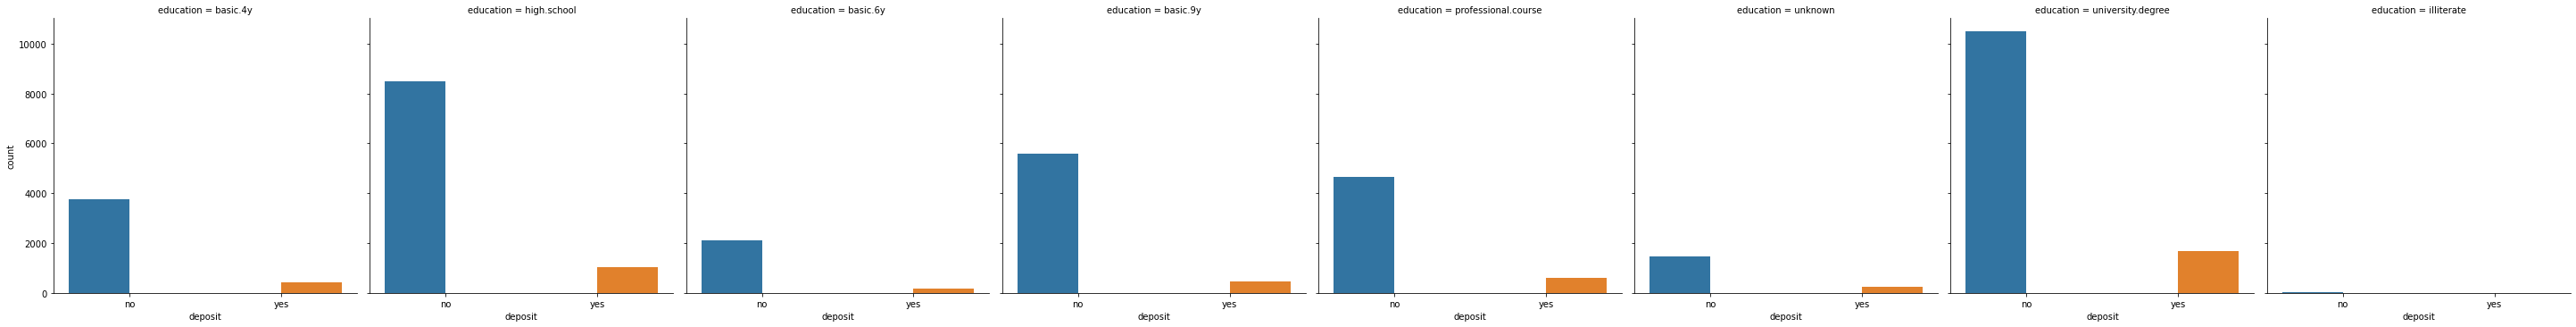

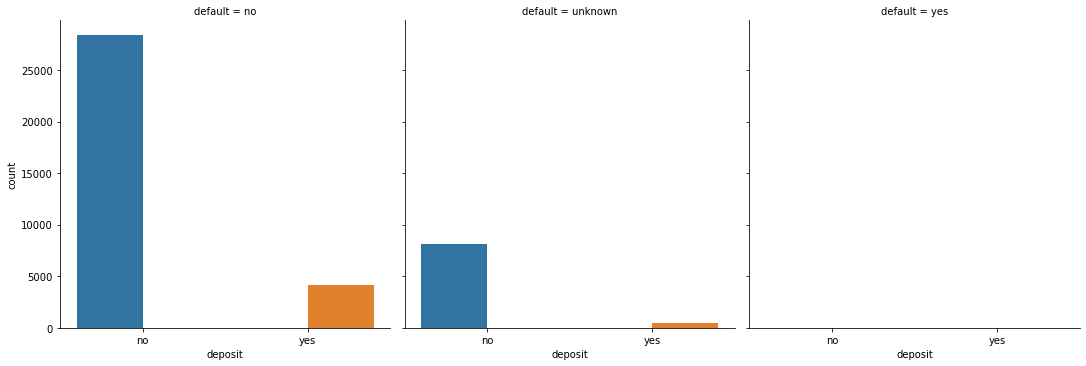

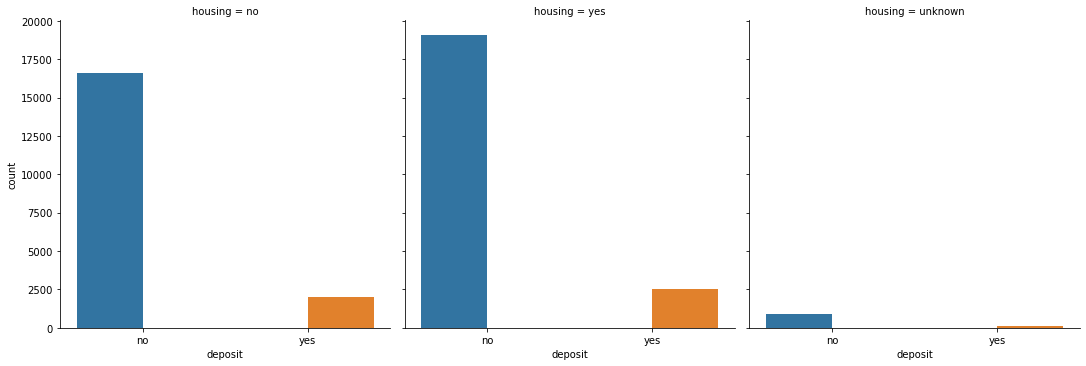

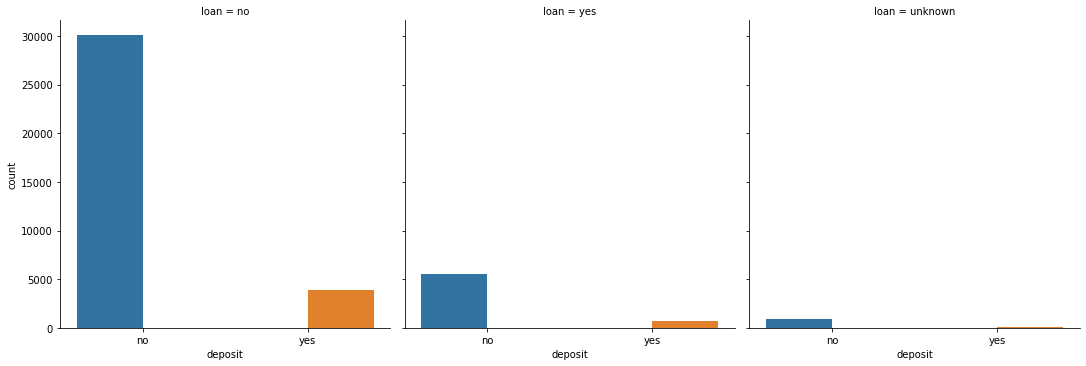

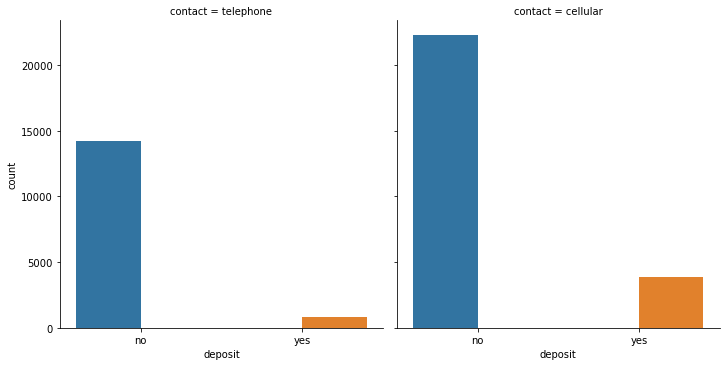

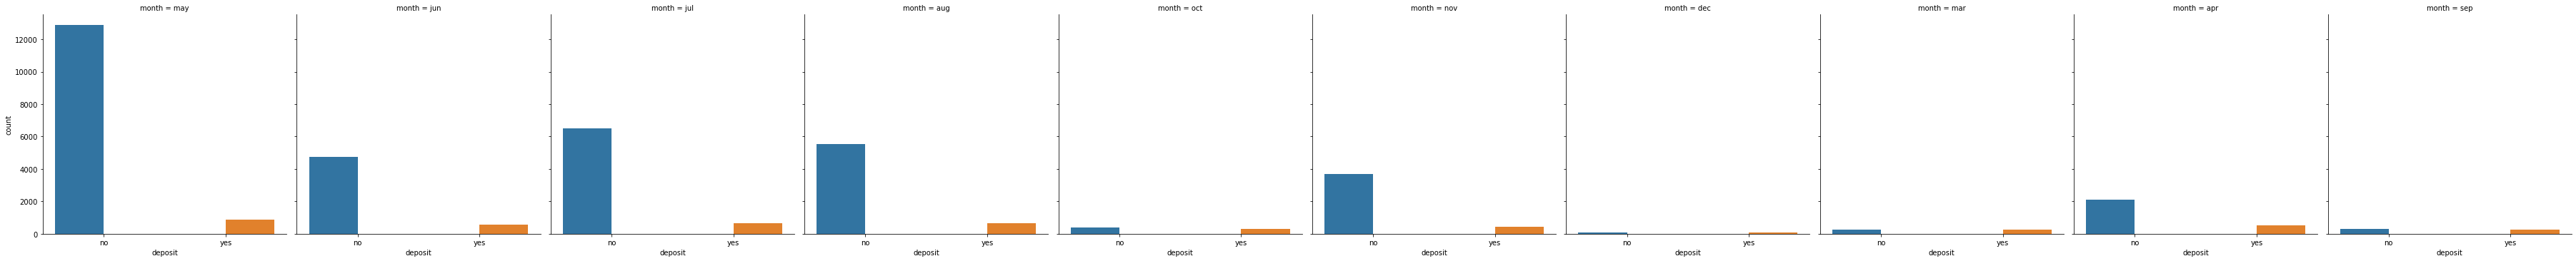

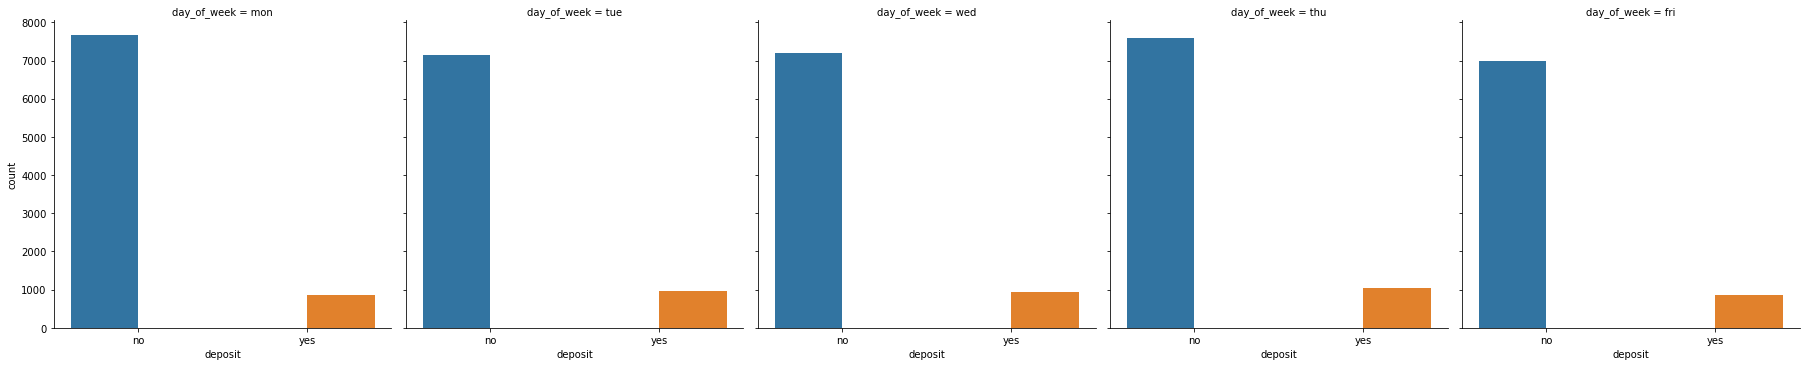

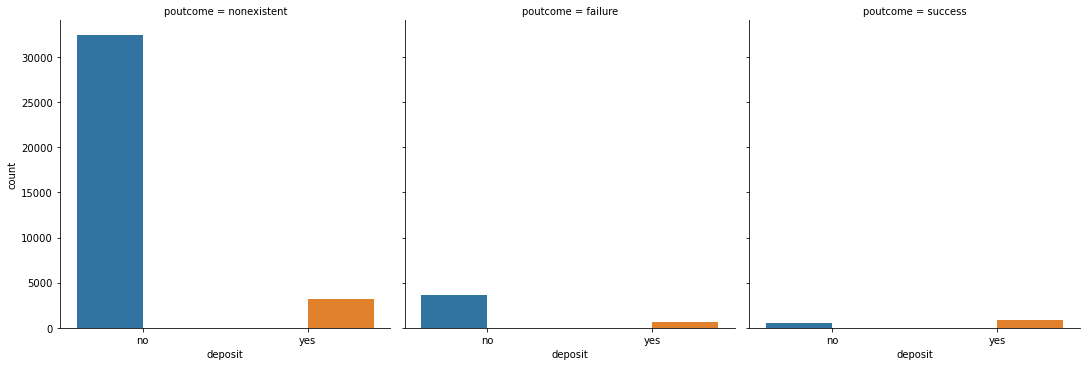

In [37]:
#Find out the relationship between categorical variable and dependent variable
for categorical_feature in categorical_feature_list:
    sns.catplot(x='deposit', hue='deposit',col=categorical_feature, kind='count', data= bank_df)
plt.show()